In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/data.csv')
df.head()

,id,branch,found,course,daynight,major,school,school_area,sex,age,...,q001,q002,q003,q004,q006,p001,p026,p029,p036,p045
0,5.0,1.0,3.0,3.0,0,1.0,1.0,1,1,26.333333,...,3.0,2.0,8.0,0,1.0,1.0,5.0,5.0,6.00,0
1,167.0,1.0,3.0,5.0,1,1.0,1.0,1,1,24.333333,...,2.0,3.0,5.0,1,3.0,1.0,5.0,5.0,2.00,0
2,187.0,1.0,3.0,3.0,0,1.0,1.0,0,1,28.500000,...,5.0,10.0,7.0,0,3.0,1.0,5.0,6.0,3.01,0
3,237.0,1.0,3.0,3.0,1,1.0,1.0,1,1,23.500000,...,4.0,2.0,7.0,0,3.0,1.0,3.0,4.0,3.00,0
4,260.0,1.0,3.0,5.0,1,1.0,1.0,0,1,24.750000,...,1.0,5.0,6.0,0,1.0,1.0,3.0,3.0,2.00,0


In [3]:
df.columns

Index(['id', 'branch', 'found', 'course', 'daynight', 'major', 'school',
       'school_area', 'sex', 'age', 'hire_state', 'b022', 'b023', 'b036',
       'b038', 'b039', 'b040', 'f009', 'i001', 'i033', 'i037', 'i042', 'i046',
       'i066', 'i076', 'l001', 'l009', 'l016', 'm002', 'k110', 'k004', 'k007',
       'k009', 'k011', 'q001', 'q002', 'q003', 'q004', 'q006', 'p001', 'p026',
       'p029', 'p036', 'p045'],
      dtype='object')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(df.drop(['hire_state'],axis=1), df['hire_state'], random_state=0)

In [5]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.7688227241615332, 0.7785476007185014)

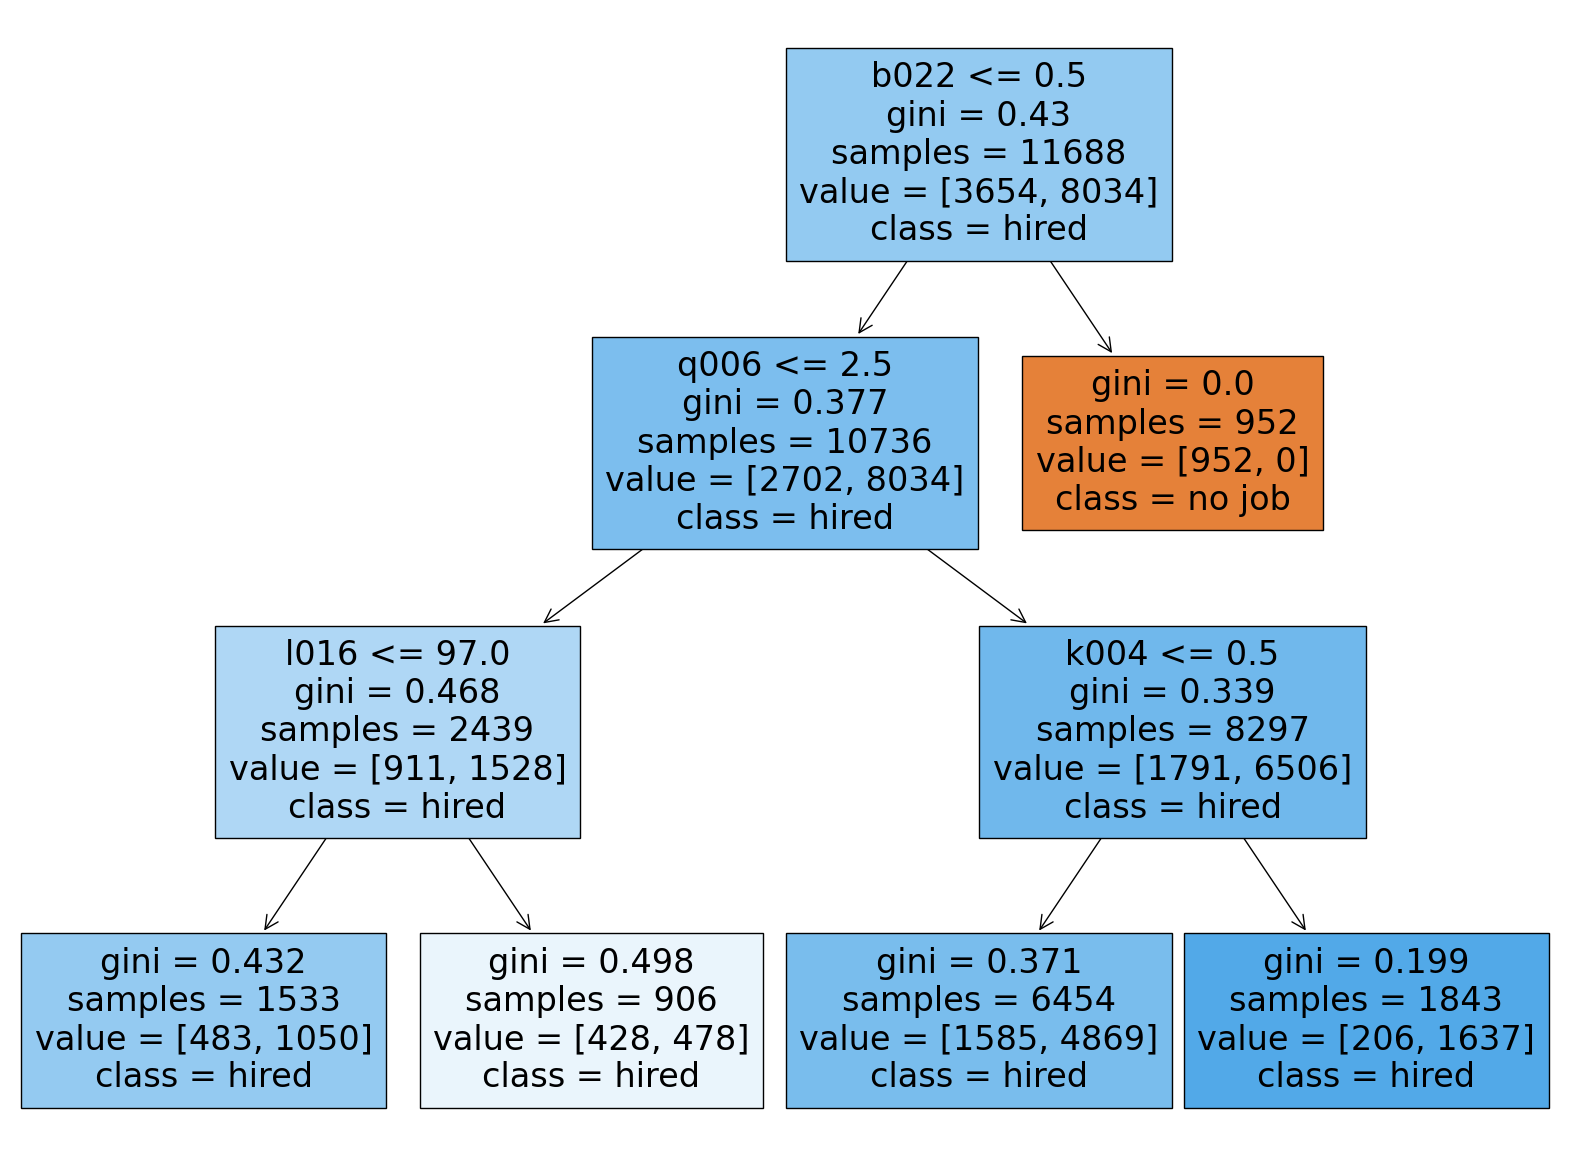

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=list(X_train.columns),    # 특성 이름 
          class_names=['no job','hired'],  # 클래스 이름
          max_depth=5 # 그림에 대하여 최대 깊이 지정
)
plt.show()

In [7]:
aa = df[['hire_state','b040']]
aa.groupby('hire_state').value_counts()

hire_state  b040
0           0        3981
            1         872
1           0       10732
Name: count, dtype: int64

In [8]:
# b로 시작하는 변수 삭제제
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(df.drop(['hire_state','b022', 'b023', 'b036', 'b038', 'b039', 'b040'],axis=1), df['hire_state'], random_state=0)

In [9]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.7015742642026009, 0.6918142160636387)

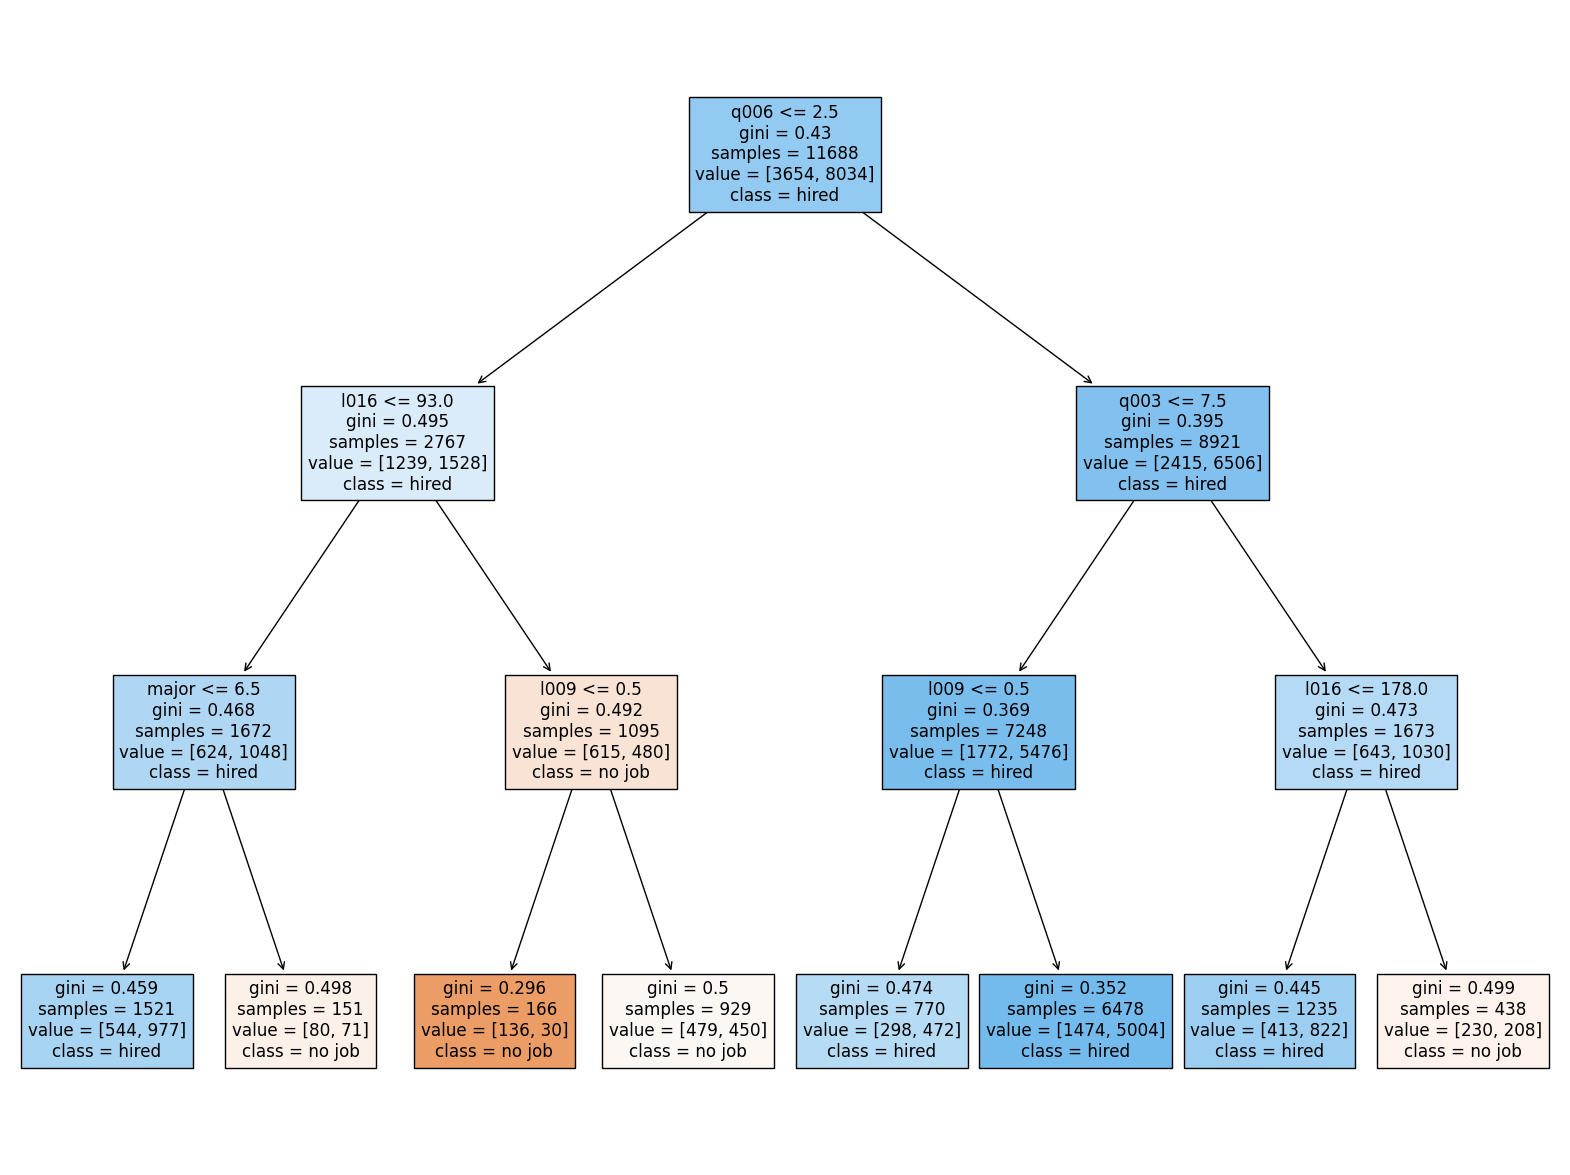

In [10]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
# plot_tree(dt_clf)
plot_tree(dt_clf, filled=True,   # 색 채우기 옵션 (특정 클래스의 비율 표현)
          feature_names=list(X_train.columns),    # 특성 이름 
          class_names=['no job','hired'],  # 클래스 이름
          max_depth=5 # 그림에 대하여 최대 깊이 지정
)
plt.show()
# q006: 음주빈도2.5이하 취직, l016: 훈련시간 93시간 이하 취직, q003: 하루 평균 수면시간7.5이하 취직

In [20]:
# cv stratified 머시기로 해보기
from sklearn.model_selection import GridSearchCV
params = {
    "max_depth": [1,2,3,4,5,6,7]
}
gscv_tree = GridSearchCV (dt_clf, params, scoring ='accuracy', cv = 5)
gscv_tree.fit(X_train, y_train)

pd.DataFrame(gscv_tree.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009799,0.001067,0.001502,0.000445,1,{'max_depth': 1},0.687340,0.687340,0.687340,0.687634,0.687206,0.687372,0.000141,7
1,0.014109,0.000394,0.001600,0.000490,2,{'max_depth': 2},0.695038,0.712575,0.698033,0.692769,0.694480,0.698579,0.007201,6
2,0.019197,0.000262,0.001400,0.000490,3,{'max_depth': 3},0.693328,0.713003,0.702310,0.691485,0.696192,0.699263,0.007787,5
3,0.024661,0.001134,0.001493,0.000440,4,{'max_depth': 4},0.710009,0.724123,0.705731,0.706461,0.702182,0.709701,0.007627,1
4,0.029526,0.001137,0.001704,0.000398,5,{'max_depth': 5},0.711292,0.725834,0.703165,0.705605,0.691057,0.707391,0.011342,3
5,0.036240,0.000773,0.001665,0.000454,6,{'max_depth': 6},0.707870,0.724123,0.704021,0.702182,0.700043,0.707648,0.008630,2
6,0.042191,0.000943,0.001001,0.000002,7,{'max_depth': 7},0.698460,0.720274,0.701027,0.697903,0.694480,0.702429,0.009163,4


In [22]:
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=4)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=5)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=6)   # max_depth : 가지치기 (최대 깊이 지정)
dt_clf.fit(X_train, y_train)

print(dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test))

0.7174024640657084 0.7143956889915319
0.7238193018480493 0.7097767513471901
0.731776180698152 0.7095201437002823


In [ ]:
# oversampleing

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',  # 특성의 일부만 사용
    random_state=42
)
rf_clf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf_clf.score(X_test, y_test))

In [23]:
# !pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.7 MB/s eta 0:01:16
   ---------------------------------------- 0.2/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 0.4/124.9 MB 3.1 MB/s eta 0:00:40
   ---------------------------------------- 0.7/124.9 MB 4.3 MB/s eta 0:00:29
   ---------------------------------------- 1.2/124.9 MB 5.6 MB/s eta 0:00:23
    --------------------------------------- 1.8/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 2.3/124.9 MB 7.3 MB/s eta 0:00:17
    --------------------------------------- 2.7/124.9 MB 7.9 MB/s eta 0:00:16
   - -------------------------------------- 3.1/124.9 MB 7.7 MB/s eta 0:00:16
   - -----------------